In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr

In [14]:
train_df= pd.read_csv('TRAIN.csv')
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

(188340, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   Order          188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
None
            Store_id        Holiday          Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min 

In [15]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format="%d-%m-%Y")
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek  # Monday=0, Sunday=6
train_df['Is_Weekend'] = train_df['DayOfWeek'].isin([5, 6]).astype(int)
train_df['YearMonth'] = train_df['Date'].dt.to_period('M')

categorical_columns=['Store_Type','Location_Type','Region_Code','Discount','Holiday']
for columns in categorical_columns:
    train_df[columns]=train_df[columns].astype('category')
    
duplicates = train_df.duplicated(subset=['ID']).sum()
print(f"Duplicate IDs: {duplicates}")

print(train_df)


Duplicate IDs: 0
              ID  Store_id Store_Type Location_Type Region_Code       Date  \
0       T1000001         1         S1            L3          R1 2018-01-01   
1       T1000002       253         S4            L2          R1 2018-01-01   
2       T1000003       252         S3            L2          R1 2018-01-01   
3       T1000004       251         S2            L3          R1 2018-01-01   
4       T1000005       250         S2            L3          R4 2018-01-01   
...          ...       ...        ...           ...         ...        ...   
188335  T1188336       149         S2            L3          R2 2019-05-31   
188336  T1188337       153         S4            L2          R1 2019-05-31   
188337  T1188338       154         S1            L3          R2 2019-05-31   
188338  T1188339       155         S3            L1          R2 2019-05-31   
188339  T1188340       152         S2            L1          R1 2019-05-31   

       Holiday Discount  Order     Sales  Year

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


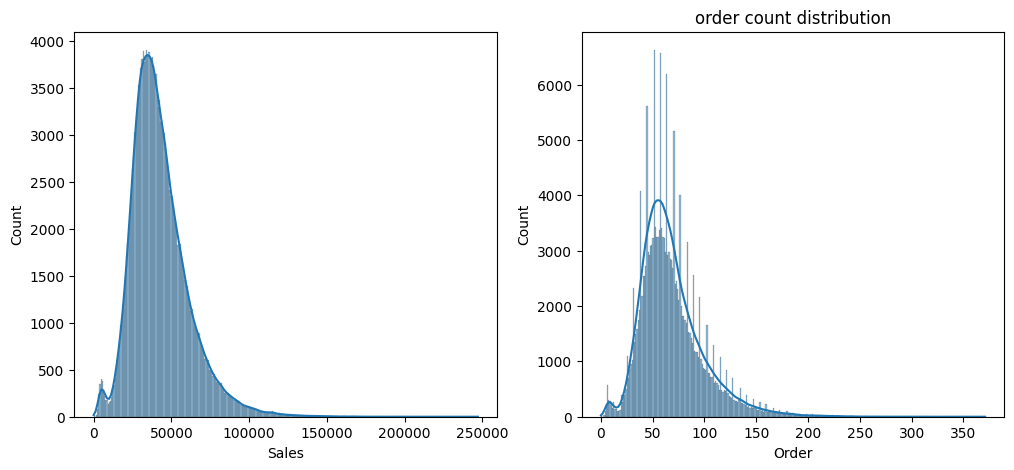

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


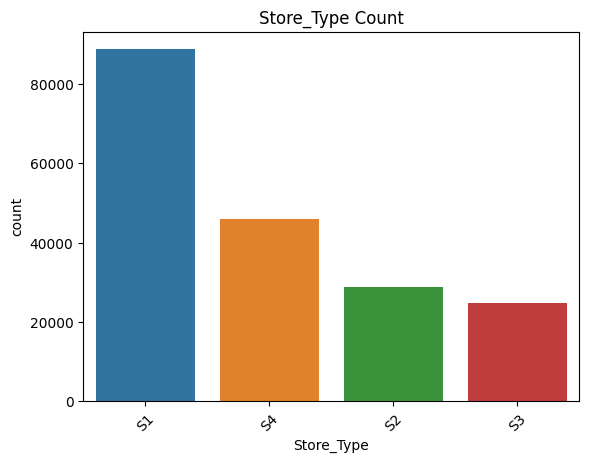


 frequency table for Store_Type:
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


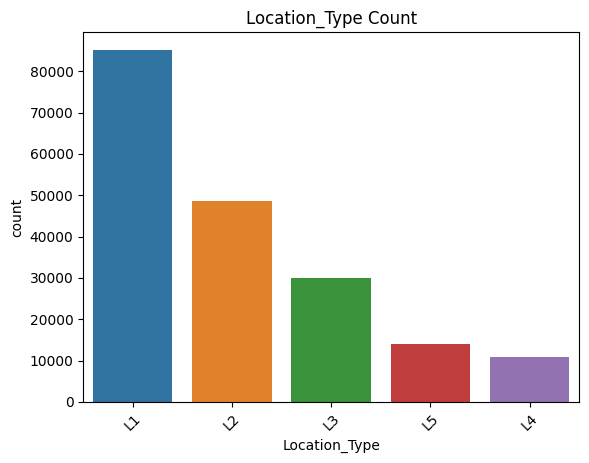


 frequency table for Location_Type:
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


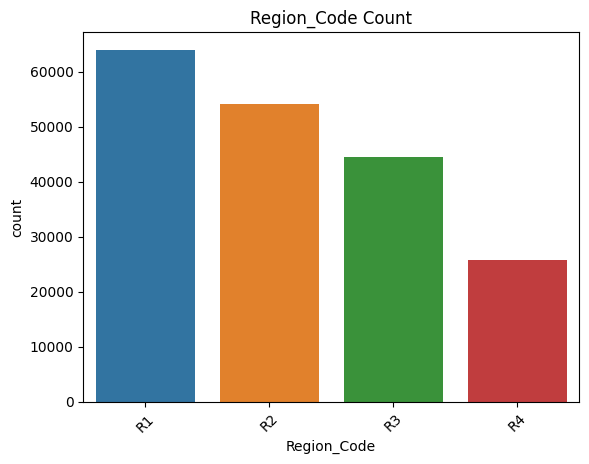


 frequency table for Region_Code:
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


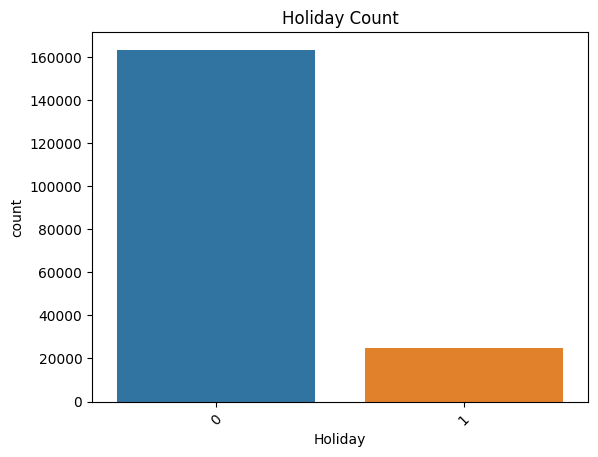


 frequency table for Holiday:
Holiday
0    163520
1     24820
Name: count, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


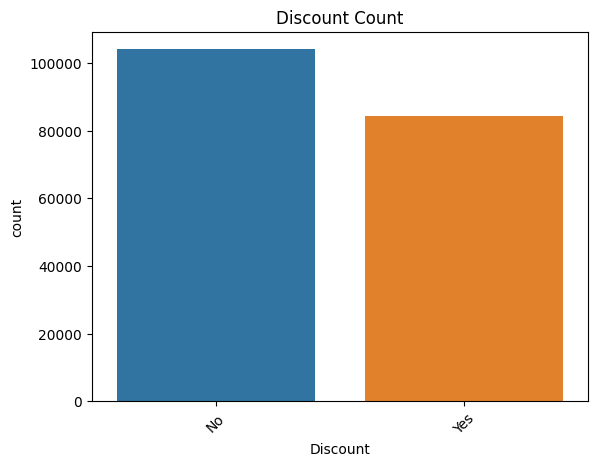


 frequency table for Discount:
Discount
No     104051
Yes     84289
Name: count, dtype: int64


In [16]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(train_df['Sales'],kde=True,ax=ax[0])
sns.histplot(train_df['Order'],kde=True,ax=ax[1])
ax[1].set_title('order count distribution')
plt.show()

categorical_col=['Store_Type','Location_Type','Region_Code','Holiday','Discount']
for col in categorical_col:
    sns.countplot(data=train_df,x=col,order=train_df[col].value_counts().index)
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n frequency table for {col}:")
    print(train_df[col].value_counts())

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=train_df,x='Order',y='Sales',hue='Discount',palette='coolwarm')
plt.title('order vs sales(discount highlighted)')
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=train_df,x='Order',y='Sales',hue='Holiday',palette='Set2')
plt.title('order vs sales (holiday highlighted)')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


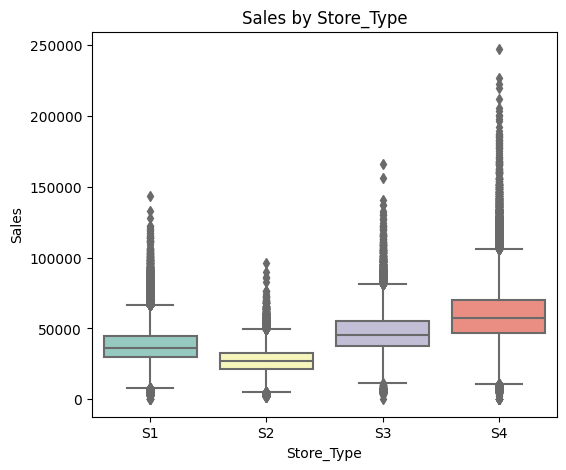

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


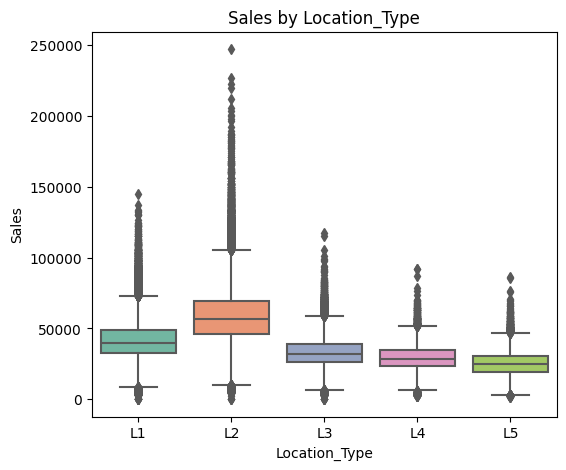

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(data=train_df,x='Store_Type',y='Sales',palette='Set3')
plt.title('Sales by Store_Type')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=train_df,x='Location_Type',y='Sales',palette='Set2')
plt.title('Sales by Location_Type')
plt.show()

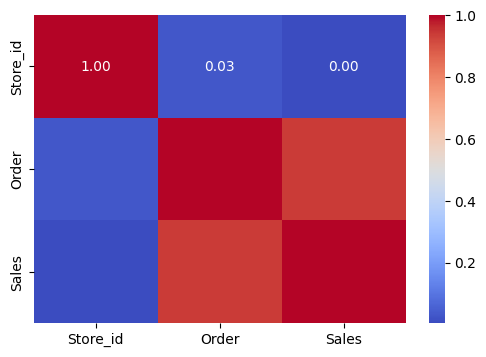

In [18]:
numerical_cols=train_df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(6,4))
sns.heatmap(numerical_cols.corr(), annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


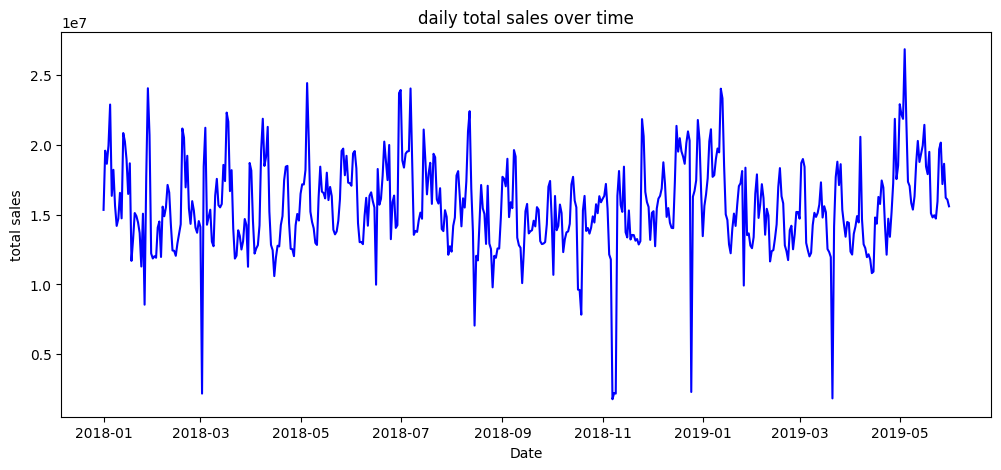

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


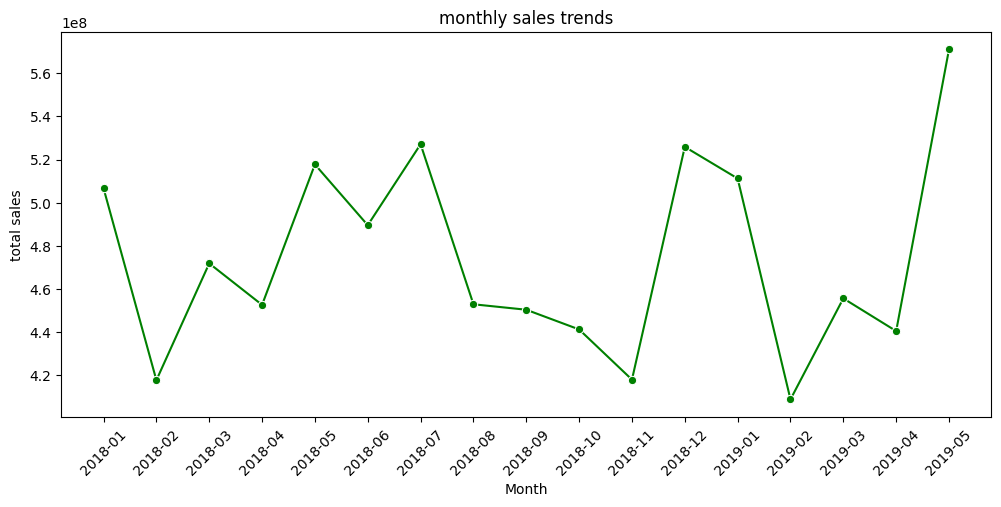

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


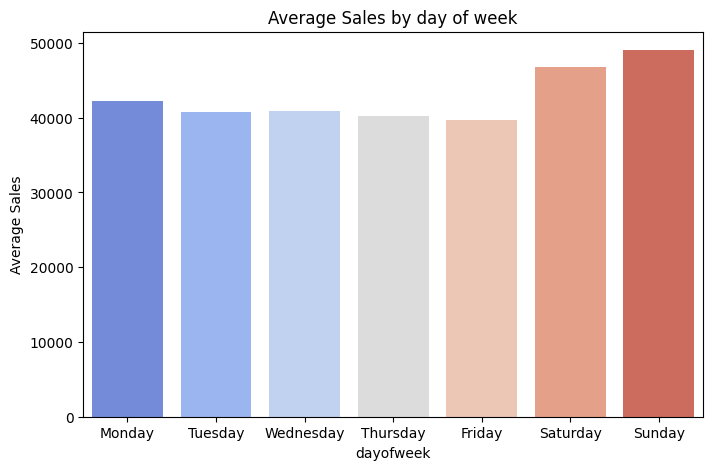

C:\Users\HP\AppData\Local\Temp\ipykernel_14368\3391780094.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_sales=train_df.groupby(['Date','Holiday'])['Sales'].sum().reset_index()
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The defaul

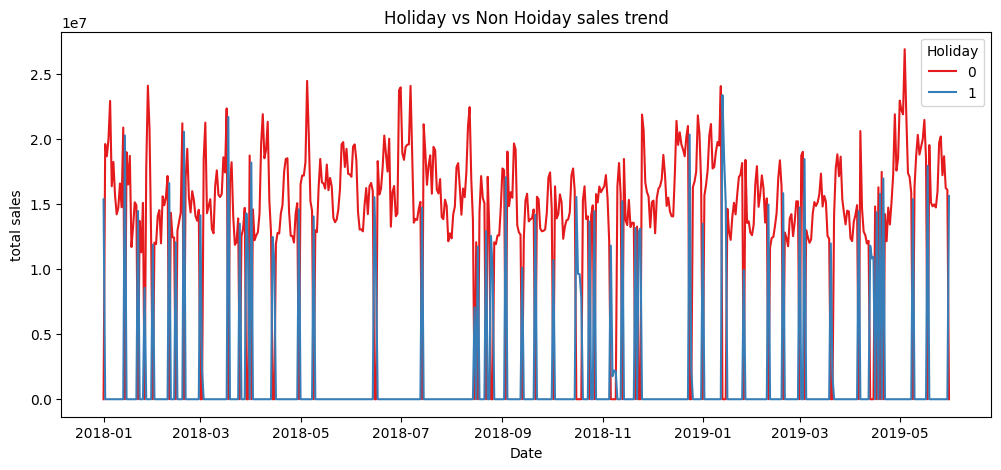

In [19]:
train_df['Date']=pd.to_datetime(train_df['Date'],format='%d-%m-%y')
daily_sales=train_df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=daily_sales,x='Date',y='Sales',color='blue')
plt.title('daily total sales over time')
plt.xlabel('Date')
plt.ylabel('total sales')
plt.show()

train_df['YearMonth']=train_df['Date'].dt.to_period('M').astype(str)
monthly_sales=train_df.groupby('YearMonth')['Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales,x='YearMonth',y='Sales',marker='o',color='green')
plt.xticks(rotation=45)
plt.title('monthly sales trends')
plt.xlabel('Month')
plt.ylabel('total sales')
plt.show()

train_df['dayofweek']=train_df['Date'].dt.day_name()
dow_sales=train_df.groupby('dayofweek')['Sales'].mean().reset_index()
dow_sales['dayofweek']=pd.Categorical(dow_sales['dayofweek'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
plt.figure(figsize=(8,5))
sns.barplot(data=dow_sales, x='dayofweek',y='Sales',palette='coolwarm')
plt.title('Average Sales by day of week')
plt.ylabel('Average Sales')
plt.show()

holiday_sales=train_df.groupby(['Date','Holiday'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=holiday_sales,x='Date',y='Sales',hue='Holiday',palette='Set1')
plt.title('Holiday vs Non Hoiday sales trend')
plt.ylabel('total sales')
plt.xlabel('Date')
plt.show()

In [20]:
q1=train_df['Sales'].quantile(0.25)
q3=train_df['Sales'].quantile(0.75)
iqr= q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers_iqr=train_df[(train_df['Sales']<lower_bound)|(train_df['Sales']>upper_bound)]
print(f"Number of outliers(IQR method):{len(outliers_iqr)}")

train_df['Sales_z']=zscore(train_df['Sales'])

outliers_z=train_df[abs(train_df['Sales_z'])>3]
print(f"Number of outliers(z-score method):{len(outliers_z)}")

train_df['Sales'] = np.where(train_df['Sales'] > upper_bound, upper_bound, train_df['Sales'])

train_df


Number of outliers(IQR method):5843
Number of outliers(z-score method):2421


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales,Year,Month,Week,DayOfWeek,Is_Weekend,YearMonth,dayofweek,Sales_z
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,0,0,2018-01,Monday,-1.938189
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,0,0,2018-01,Monday,0.487889
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,0,0,2018-01,Monday,-0.320542
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,0,0,2018-01,Monday,-1.249910
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,0,0,2018-01,Monday,0.153343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2019,5,22,4,0,2019-05,Friday,-0.298663
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,2019,5,22,4,0,2019-05,Friday,0.638702
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,2019,5,22,4,0,2019-05,Friday,-0.604647
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,2019,5,22,4,0,2019-05,Friday,0.345571


In [21]:
sales_discount=train_df[train_df['Discount']!='Yes']['Sales']
sales_no_discount=train_df[train_df['Discount']=='No']['Sales']

t_stat,p_val=ttest_ind(sales_discount,sales_no_discount,equal_var=False)

print(" Impact of Discounts on Sales:")
if p_val<0.05:
    print("Reject Null discounts significantly impact sales.")
else:
    print("fail to reject null Discounts Don't significantly impact sales.")

sales_holiday= train_df[train_df['Holiday']==1]['Sales']
sales_nonholiday=train_df[train_df['Holiday']==0]['Sales']

t_stat, p_val= ttest_ind(sales_holiday, sales_nonholiday,equal_var=False)

print("Effect of Holidays on Sales:")
if p_val<0.05:
    print("Reject Null holidays significantly impact sales.")
else:
    print("fail to reject null holidays significantly impact sales")



groups=[group['Sales'].values for name, group in train_df.groupby('Store_Type')]
f_stat,p_val= f_oneway(*groups)

print("Sales Differences Across Store Types:")
if p_val<0.05:
    print("Reject Null store_type significantly impact sales.")
else:
    print("fail to reject null store_type significantly impact sales")

groups=[group['Sales'].values for name, group in train_df.groupby('Region_Code')]
kruskal(*groups)

print("Regional Sales Variability:")
if p_val<0.05:
    print("Reject Null Region_code significantly impact sales.")
else:
    print("fail to reject null Region_code significantly impact sales")

corr, p_val = pearsonr(train_df['Order'], train_df['Sales'])

print("Pearsonr Correlation between Orders and Sales:")
if p_val<0.05:
    print("Reject Null order significantly impact sales.")
else:
    print("fail to reject null order significantly impact sales")


# If data is skewed:

print("spearmanr Correlation between Orders and Sales:")
corr, p_val = spearmanr(train_df['Order'], train_df['Sales'])

if p_val<0.05:
    print("Reject Null order significantly impact sales.")
else:
    print("fail to reject null order significantly impact sales")


 Impact of Discounts on Sales:
fail to reject null Discounts Don't significantly impact sales.
Effect of Holidays on Sales:
Reject Null holidays significantly impact sales.


C:\Users\HP\AppData\Local\Temp\ipykernel_14368\3417656146.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=[group['Sales'].values for name, group in train_df.groupby('Store_Type')]
C:\Users\HP\AppData\Local\Temp\ipykernel_14368\3417656146.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=[group['Sales'].values for name, group in train_df.groupby('Region_Code')]


Sales Differences Across Store Types:
Reject Null store_type significantly impact sales.
Regional Sales Variability:
Reject Null Region_code significantly impact sales.
Pearsonr Correlation between Orders and Sales:
Reject Null order significantly impact sales.
spearmanr Correlation between Orders and Sales:
Reject Null order significantly impact sales.
